In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree

In [30]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [31]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [32]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [33]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [34]:
data=pd.get_dummies(data,columns=['Undergrad', 'Marital.Status', 'Urban'],drop_first=True)

In [35]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,False,False,True,True
1,33700,134075,18,True,False,False,True
2,36925,160205,30,False,True,False,True
3,50190,193264,15,True,False,True,True
4,81002,27533,28,False,True,False,False
...,...,...,...,...,...,...,...
595,76340,39492,7,True,False,False,True
596,69967,55369,2,True,False,False,True
597,47334,154058,0,False,False,False,True
598,98592,180083,17,True,True,False,False


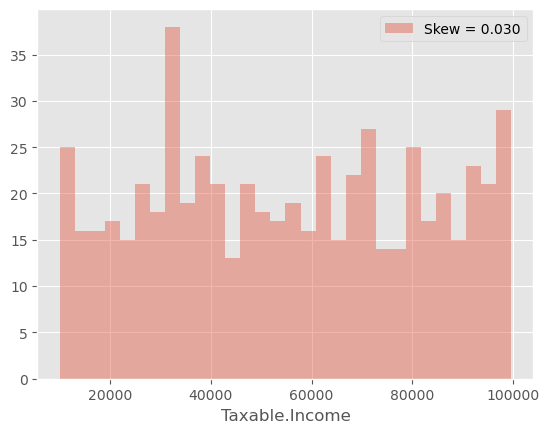

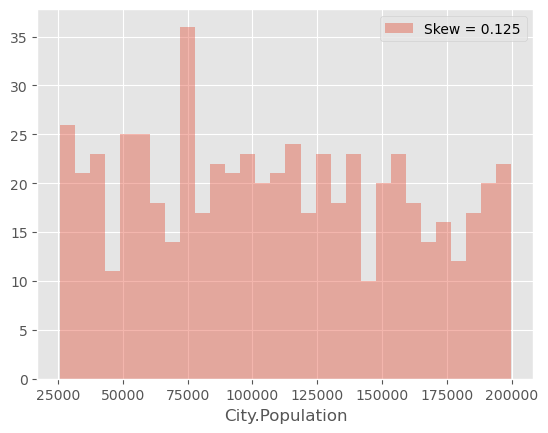

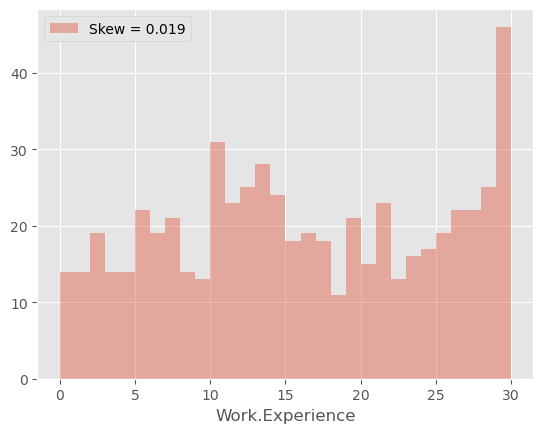

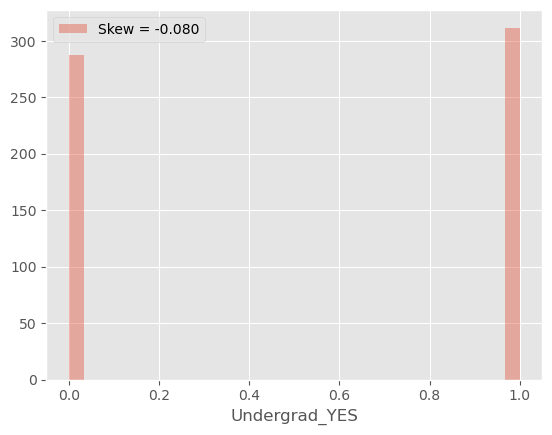

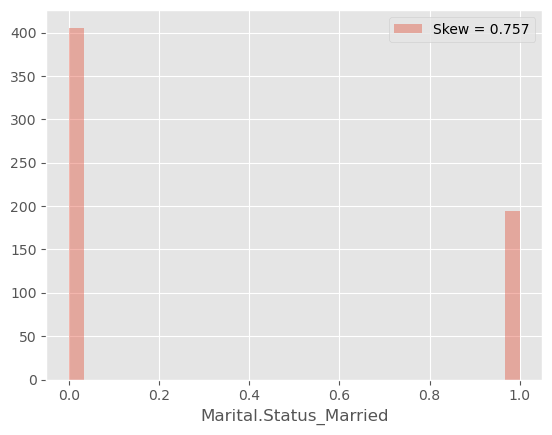

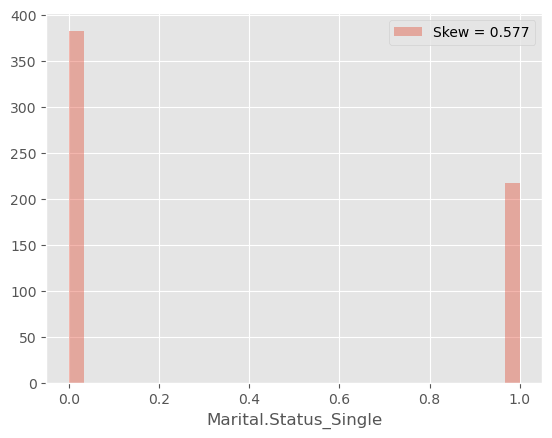

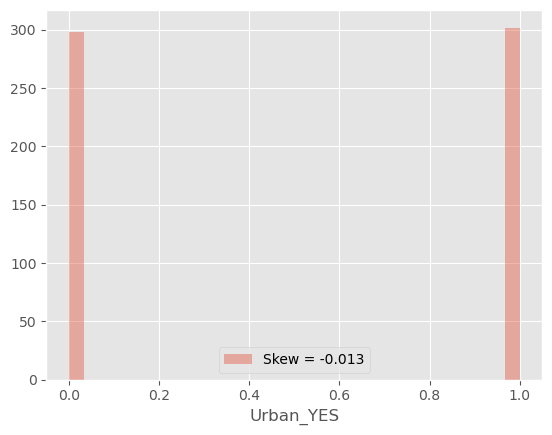

In [36]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

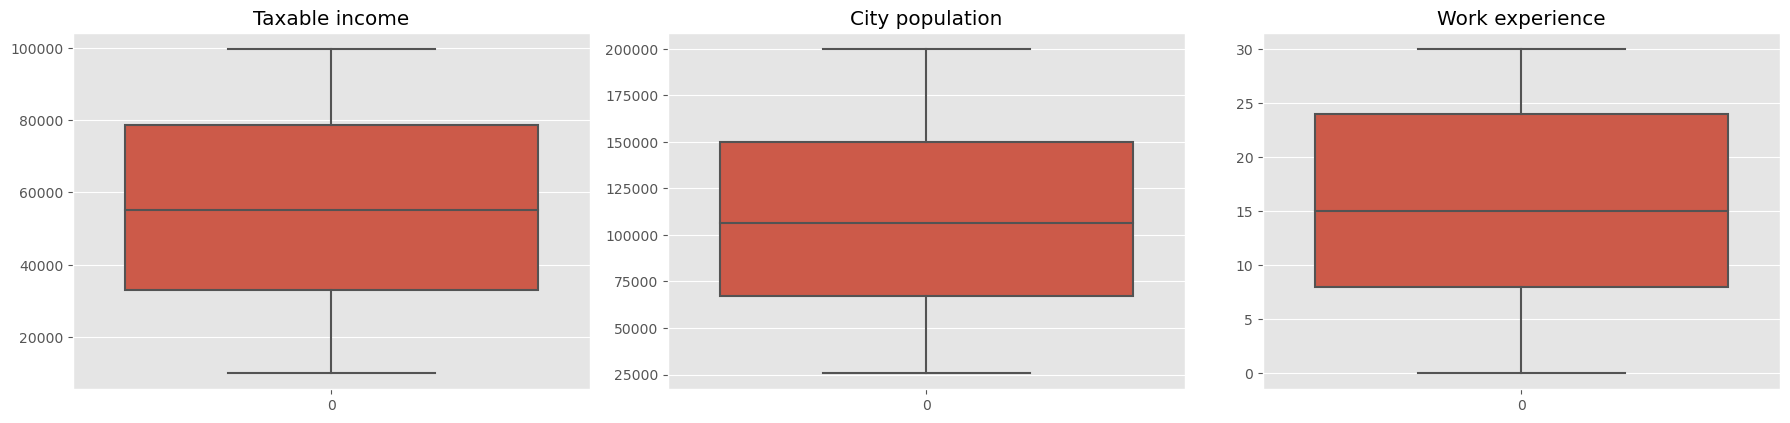

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(18,12))

plt.subplot(3,3,1)
sns.boxplot(data['Taxable.Income'])
plt.title('Taxable income')

plt.subplot(3,3,2)
sns.boxplot(data['City.Population'])
plt.title('City population')

plt.subplot(3,3,3)
sns.boxplot(data['Work.Experience'])
plt.title('Work experience')

plt.tight_layout()

In [38]:
 #No outliers

In [39]:
 # Adding new column for treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [40]:
data['income'] = '30000'

In [41]:
data.loc[data['Taxable.Income'] > 30000 , 'income'] = "Good"
data.loc[data['Taxable.Income'] <= 30000 , 'income'] = "Risky" 
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
0,68833,50047,10,False,False,True,True,Good
1,33700,134075,18,True,False,False,True,Good
2,36925,160205,30,False,True,False,True,Good
3,50190,193264,15,True,False,True,True,Good
4,81002,27533,28,False,True,False,False,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,True,False,False,True,Good
596,69967,55369,2,True,False,False,True,Good
597,47334,154058,0,False,False,False,True,Good
598,98592,180083,17,True,True,False,False,Good


In [42]:
data.drop('Taxable.Income' , axis =1 , inplace= True)
data

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
0,50047,10,False,False,True,True,Good
1,134075,18,True,False,False,True,Good
2,160205,30,False,True,False,True,Good
3,193264,15,True,False,True,True,Good
4,27533,28,False,True,False,False,Good
...,...,...,...,...,...,...,...
595,39492,7,True,False,False,True,Good
596,55369,2,True,False,False,True,Good
597,154058,0,False,False,False,True,Good
598,180083,17,True,True,False,False,Good


In [43]:
data['income'].value_counts()

income
Good     476
Risky    124
Name: count, dtype: int64

In [44]:
label_en = LabelEncoder()
for i in range(0 , data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])
    else:
        pass

In [45]:
data

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,income
0,50047,10,False,False,True,True,0
1,134075,18,True,False,False,True,0
2,160205,30,False,True,False,True,0
3,193264,15,True,False,True,True,0
4,27533,28,False,True,False,False,0
...,...,...,...,...,...,...,...
595,39492,7,True,False,False,True,0
596,55369,2,True,False,False,True,0
597,154058,0,False,False,False,True,0
598,180083,17,True,True,False,False,0


In [46]:
x = data.drop('income' , axis = 1)
y = data['income']

In [51]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.2,random_state= 1)

## Model Building

In [53]:
model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth= range (0,20)
params_grid = [{'criterion' : criterion , 'max_depth' : max_depth}]
grid = GridSearchCV(estimator = model , param_grid = params_grid)
grid.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(0, 20)}])

In [54]:
print('Best params:' , grid.best_params_)
print('Best score:' , grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 1}
Best score: 0.7895833333333333


In [55]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 1 )
dtc.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

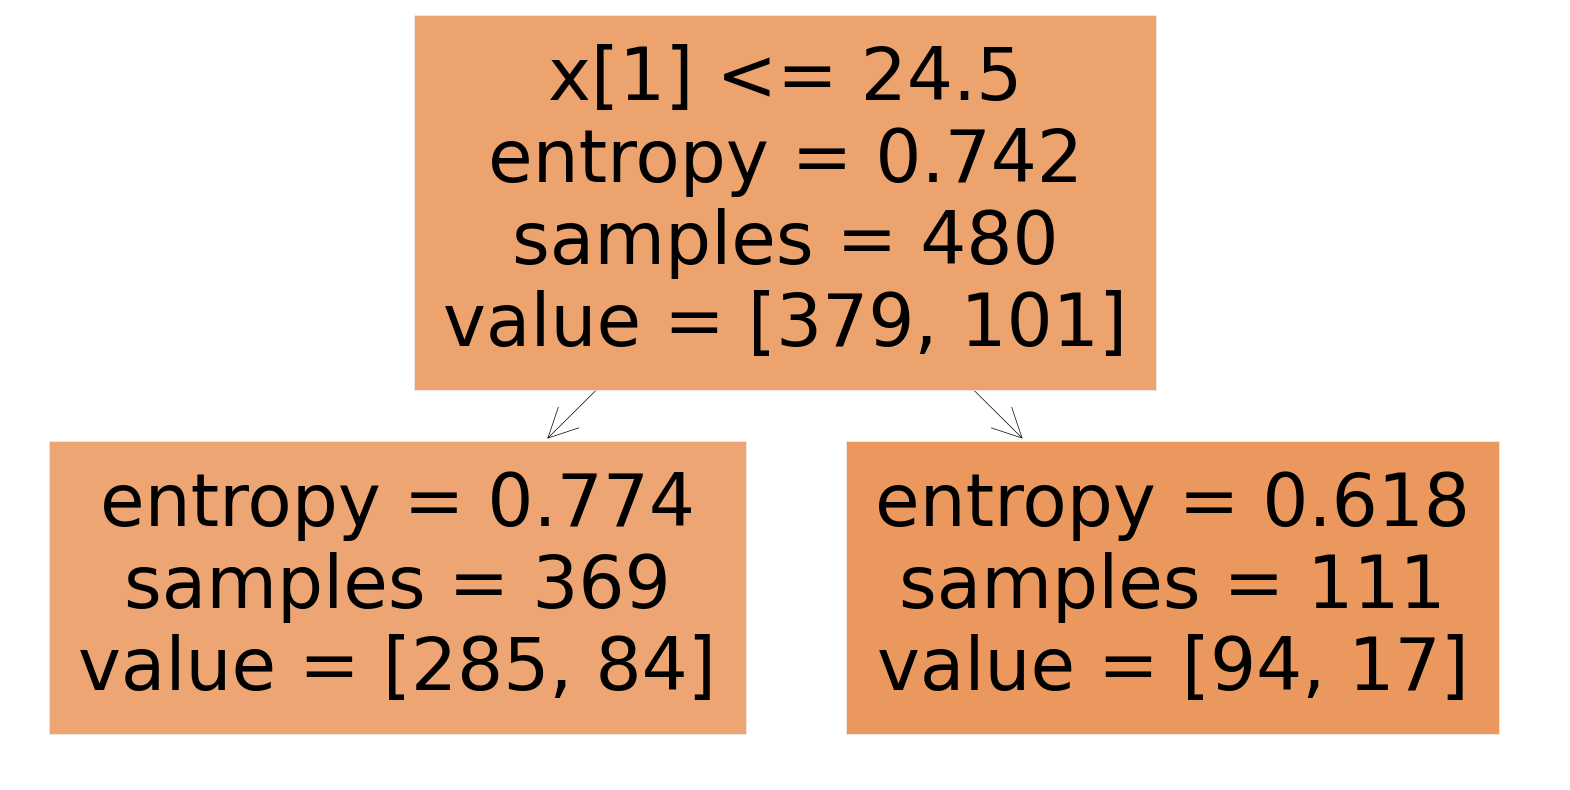

In [56]:
plt.figure(figsize=(20,10))
tree.plot_tree(dtc,filled=True)
plt.show()

## Model evaluation 

In [57]:
y_pred = dtc.predict(x_test)
accuracy_score(y_test , y_pred)

0.8083333333333333

In [58]:
confusion_matrix(y_test , y_pred)

array([[97,  0],
       [23,  0]], dtype=int64)

In [59]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



In [60]:
print('Training accuracy: ', dtc.score(x_train,y_train))
print('Testing Accuracy: ', dtc.score(x_test,y_test))

Training accuracy:  0.7895833333333333
Testing Accuracy:  0.8083333333333333
